In [8]:
import numpy as np
import pandas as pd
from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

C:\Users\saidi\AppData\Local\Temp\ipykernel_7636\2855256632.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [9]:
df = pd.read_csv('Data/UNSW_NB15_training-set.csv')

In [10]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [12]:
df.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.09020,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.00030,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.00510,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.66080,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.00250,...,1,3,0,0,0,2,3,0,Normal,0
5,6,0.000003,udp,-,INT,2,0,784,0,333333.32150,...,1,2,0,0,0,2,2,0,Normal,0
6,7,0.000006,udp,-,INT,2,0,1960,0,166666.66080,...,1,2,0,0,0,2,2,0,Normal,0
7,8,0.000028,udp,-,INT,2,0,1384,0,35714.28522,...,1,3,0,0,0,1,3,0,Normal,0
8,9,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0
9,10,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0


In [13]:
df.describe(include='all')

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,82332.000000,82332.000000,82332,82332,82332,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332,82332.000000
unique,NaN,NaN,131,13,7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,43095,47153,39339,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37000,NaN
mean,41166.500000,1.006756,NaN,NaN,NaN,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,...,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,NaN,0.550600
std,23767.345519,4.710444,NaN,NaN,NaN,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,...,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,NaN,0.497436
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,20583.750000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,NaN,0.000000
50%,41166.500000,0.014138,NaN,NaN,NaN,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,...,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,NaN,1.000000
75%,61749.250000,0.719360,NaN,NaN,NaN,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,...,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,NaN,1.000000


In [14]:
list_drop = ['id', 'attack_cat']

In [15]:
df.drop(list_drop,axis=1,inplace=True)

In [16]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,6.305470e+05,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,2.393001e+06,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,2.112951e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.585808e+04,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,2.082111e+07,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [17]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,1,2,0,0,0,1,2,0,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,1,2,0,0,0,1,2,0,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,1,1,3,0,0,0,1,3,0,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,2,1,3,0,0,0,2,3,0,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,2,1,3,0,0,0,2,3,0,0


In [18]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,1,2,0,0,0,1,2,0,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,1,2,0,0,0,1,2,0,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,1,1,3,0,0,0,1,3,0,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,2,1,3,0,0,0,2,3,0,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,2,1,3,0,0,0,2,3,0,0


In [19]:
df['label'].value_counts()

label
1    45332
0    37000
Name: count, dtype: int64

In [20]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,1,2,0,0,0,1,2,0,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,1,2,0,0,0,1,2,0,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,1,1,3,0,0,0,1,3,0,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,2,1,3,0,0,0,2,3,0,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,2,1,3,0,0,0,2,3,0,0


In [21]:
DEBUG =0

for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('max = '+str(df_numeric[feature].max()))
        print('75th = '+str(df_numeric[feature].quantile(0.95)))
        print('median = '+str(df_numeric[feature].median()))
        print(df_numeric[feature].max()>10*df_numeric[feature].median())
        print('----------------------------------------------------')
    if df_numeric[feature].max()>10*df_numeric[feature].median() and df_numeric[feature].max()>10 :
        df[feature] = np.where(df[feature]<df[feature].quantile(0.95), df[feature], df[feature].quantile(0.95))

In [22]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.00000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,0.445016,11.84186,9.178424,1580.566135,2866.918367,71576.702810,180.967667,95.713003,4.649418e+07,3.105380e+05,...,4.466611,3.388901,7.160679,0.008284,0.008381,0.092066,5.974809,8.832532,0.011126,0.550600
std,0.672222,15.66461,14.504212,2948.850472,7525.606738,102631.946851,101.513358,116.667722,7.417784e+07,8.918691e+05,...,6.685037,5.029129,10.481621,0.091171,0.092485,0.289121,6.867156,10.124902,0.104891,0.497436
min,0.000000,1.00000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.00000,0.000000,114.000000,0.000000,28.606114,62.000000,0.000000,1.120247e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.014138,6.00000,2.000000,534.000000,178.000000,2650.176667,254.000000,29.000000,5.770032e+05,2.112951e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.719360,12.00000,10.000000,1280.000000,956.000000,111111.107200,254.000000,252.000000,6.514286e+07,1.585808e+04,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,2.403792,60.00000,54.000000,12472.000000,30622.000000,333333.321500,255.000000,253.000000,2.666667e+08,3.741446e+06,...,25.000000,18.000000,37.000000,2.000000,2.000000,1.000000,25.000000,36.000000,1.000000,1.000000


In [23]:
df_numeric = df.select_dtypes(include=[np.number])
df_before = df_numeric.copy()
DEBUG = 0
for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_numeric[feature].nunique()))
        print(df_numeric[feature].nunique()>50)
        print('----------------------------------------------------')
    if df_numeric[feature].nunique()>50:
        if df_numeric[feature].min()==0:
            df[feature] = np.log(df[feature]+1)
        else:
            df[feature] = np.log(df[feature])

df_numeric = df.select_dtypes(include=[np.number])

In [24]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,131,13,7
top,tcp,-,FIN
freq,43095,47153,39339


In [25]:
DEBUG = 0
for feature in df_cat.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_cat[feature].nunique()))
        print(df_cat[feature].nunique()>6)
        print(sum(df[feature].isin(df[feature].value_counts().head().index)))
        print('----------------------------------------------------')
    
    if df_cat[feature].nunique()>6:
        df[feature] = np.where(df[feature].isin(df[feature].value_counts().head().index), df[feature], '-')

In [26]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,6,5,6
top,tcp,-,FIN
freq,43095,49275,39339


In [27]:
df['proto'].value_counts().head().index

Index(['tcp', 'udp', '-', 'unas', 'arp'], dtype='object', name='proto')

In [28]:
df['proto'].value_counts().index

Index(['tcp', 'udp', '-', 'unas', 'arp', 'ospf'], dtype='object', name='proto')

In [29]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,udp,-,INT,0.693147,0.0,6.206576,0.0,11.417626,254,...,1.0,1.0,2.0,0,0,0.0,1.0,2.0,0,0
1,0.000008,udp,-,INT,0.693147,0.0,7.474205,0.0,11.736077,254,...,1.0,1.0,2.0,0,0,0.0,1.0,2.0,0,0
2,0.000005,udp,-,INT,0.693147,0.0,6.973543,0.0,12.206078,254,...,1.0,1.0,3.0,0,0,0.0,1.0,3.0,0,0
3,0.000006,udp,-,INT,0.693147,0.0,6.802395,0.0,12.023757,254,...,2.0,1.0,3.0,0,0,0.0,2.0,3.0,0,0
4,0.000010,udp,-,INT,0.693147,0.0,7.661998,0.0,11.512935,254,...,2.0,1.0,3.0,0,0,0.0,2.0,3.0,0,0


In [30]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,udp,-,INT,0.693147,0.0,6.206576,0.0,11.417626,254,...,1.0,1.0,2.0,0,0,0.0,1.0,2.0,0,0
1,0.000008,udp,-,INT,0.693147,0.0,7.474205,0.0,11.736077,254,...,1.0,1.0,2.0,0,0,0.0,1.0,2.0,0,0
2,0.000005,udp,-,INT,0.693147,0.0,6.973543,0.0,12.206078,254,...,1.0,1.0,3.0,0,0,0.0,1.0,3.0,0,0
3,0.000006,udp,-,INT,0.693147,0.0,6.802395,0.0,12.023757,254,...,2.0,1.0,3.0,0,0,0.0,2.0,3.0,0,0
4,0.000010,udp,-,INT,0.693147,0.0,7.661998,0.0,11.512935,254,...,2.0,1.0,3.0,0,0,0.0,2.0,3.0,0,0


In [31]:
df['label'].value_counts()

label
1    45332
0    37000
Name: count, dtype: int64

In [78]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,udp,-,INT,0.693147,0.0,6.206576,0.0,11.417626,254,...,1.0,1.0,2.0,0,0,0.0,1.0,2.0,0,0
1,0.000008,udp,-,INT,0.693147,0.0,7.474205,0.0,11.736077,254,...,1.0,1.0,2.0,0,0,0.0,1.0,2.0,0,0
2,0.000005,udp,-,INT,0.693147,0.0,6.973543,0.0,12.206078,254,...,1.0,1.0,3.0,0,0,0.0,1.0,3.0,0,0
3,0.000006,udp,-,INT,0.693147,0.0,6.802395,0.0,12.023757,254,...,2.0,1.0,3.0,0,0,0.0,2.0,3.0,0,0
4,0.000010,udp,-,INT,0.693147,0.0,7.661998,0.0,11.512935,254,...,2.0,1.0,3.0,0,0,0.0,2.0,3.0,0,0


In [32]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [33]:
y.value_counts()

label
1    45332
0    37000
Name: count, dtype: int64

In [34]:
X.head()
feature_names = list(X.columns)
np.shape(X)

(82332, 42)

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [36]:
np.shape(X)

(82332, 56)

In [37]:
df_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,6,5,6
top,tcp,-,FIN
freq,43095,49275,39339


In [38]:
X[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 1.09999395e-05, 6.93147181e-01, 0.00000000e+00,
       6.20657593e+00, 0.00000000e+00, 1.14176263e+01, 2.54000000e+02,
       0.00000000e+00, 1.90104856e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.09399400e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.51342875e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.00000000e+00, 2.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 2.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 2.00000000e+00, 0.00000000e+00])

In [39]:
for label in list(df_cat['state'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)
    
for label in list(df_cat['service'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)
    
for label in list(df_cat['proto'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify=y)

In [41]:
df_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,6,5,6
top,tcp,-,FIN
freq,43095,49275,39339


In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 18:] = sc.fit_transform(X_train[:, 18:])
X_test[:, 18:] = sc.transform(X_test[:, 18:])

In [43]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from keras import metrics
import keras
import numpy as np
from numpy import array

In [45]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [46]:
#Build the feed forward neural network model
def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=56, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='softmax')) #for multiclass classification
    #Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy',f1_m,precision_m, recall_m]
                 )
    return model

#institate the model
model = build_model()

#fit the model
start = time.time()
history=model.fit(X_train, y_train, epochs=200, batch_size=2000,verbose=2)
end_train = time.time()


Epoch 1/200


33/33 - 2s - loss: 2.4856 - accuracy: 0.3977 - f1_m: 0.0622 - precision_m: 0.2398 - recall_m: 0.0362 - 2s/epoch - 60ms/step
Epoch 2/200
33/33 - 0s - loss: 1.4146 - accuracy: 0.5536 - f1_m: 0.6403 - precision_m: 0.8955 - recall_m: 0.5248 - 78ms/epoch - 2ms/step
Epoch 3/200
33/33 - 0s - loss: 0.7696 - accuracy: 0.6739 - f1_m: 0.7305 - precision_m: 0.7566 - recall_m: 0.7141 - 113ms/epoch - 3ms/step
Epoch 4/200
33/33 - 0s - loss: 0.5214 - accuracy: 0.7485 - f1_m: 0.7132 - precision_m: 0.5756 - recall_m: 0.9416 - 75ms/epoch - 2ms/step
Epoch 5/200
33/33 - 0s - loss: 0.4282 - accuracy: 0.7669 - f1_m: 0.7028 - precision_m: 0.5534 - recall_m: 0.9631 - 71ms/epoch - 2ms/step
Epoch 6/200
33/33 - 0s - loss: 0.3711 - accuracy: 0.7916 - f1_m: 0.7008 - precision_m: 0.5563 - recall_m: 0.9472 - 70ms/epoch - 2ms/step
Epoch 7/200
33/33 - 0s - loss: 0.3352 - accuracy: 0.8166 - f1_m: 0.7019 - precision_m: 0.5532 - recall_m: 0.9602 - 75ms/epoch - 2ms/step
Epoch 8/200
33/33 - 0s - loss: 0.3092 

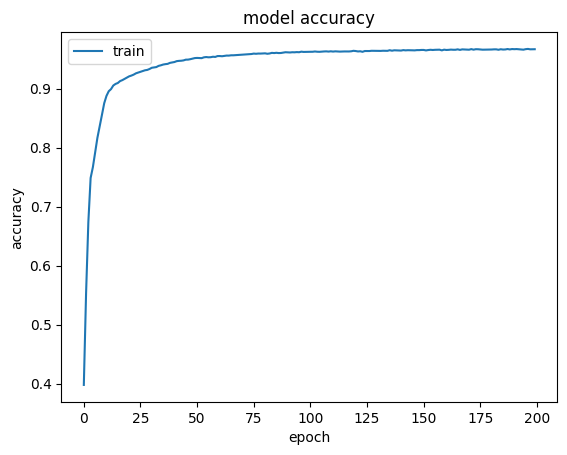

In [47]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

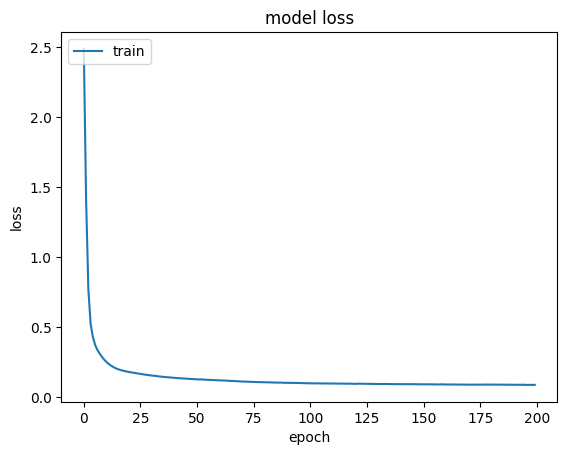

In [48]:
#epochs vs loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

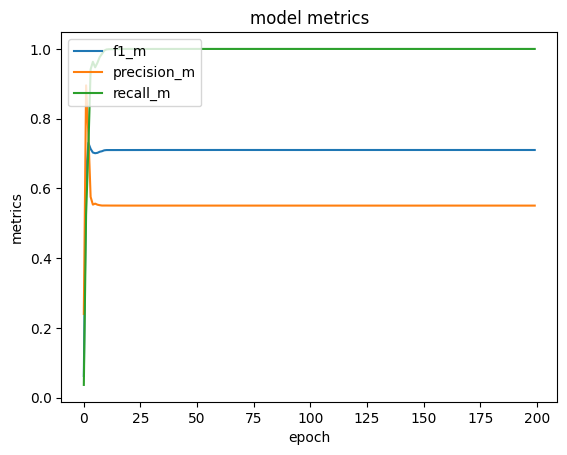

In [49]:
plt.plot(history.history['f1_m'])
plt.plot(history.history['precision_m'])
plt.plot(history.history['recall_m'])
plt.title('model metrics')
plt.ylabel('metrics')
plt.xlabel('epoch')
plt.legend(['f1_m', 'precision_m', 'recall_m'], loc='upper left')
plt.show()

In [50]:
#confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

515/515 [==============================] - 1s 2ms/step


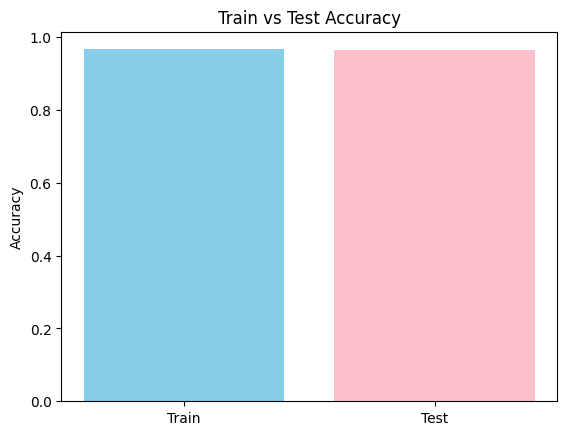

In [51]:
#plot bar chart for traininig and testing accuracy
plt.bar(['Train','Test'],[history.history['accuracy'][-1],accuracy_score(y_test, y_pred)],color=['skyblue','pink'])
plt.title('Train vs Test Accuracy')
plt.ylabel('Accuracy')
plt.show()

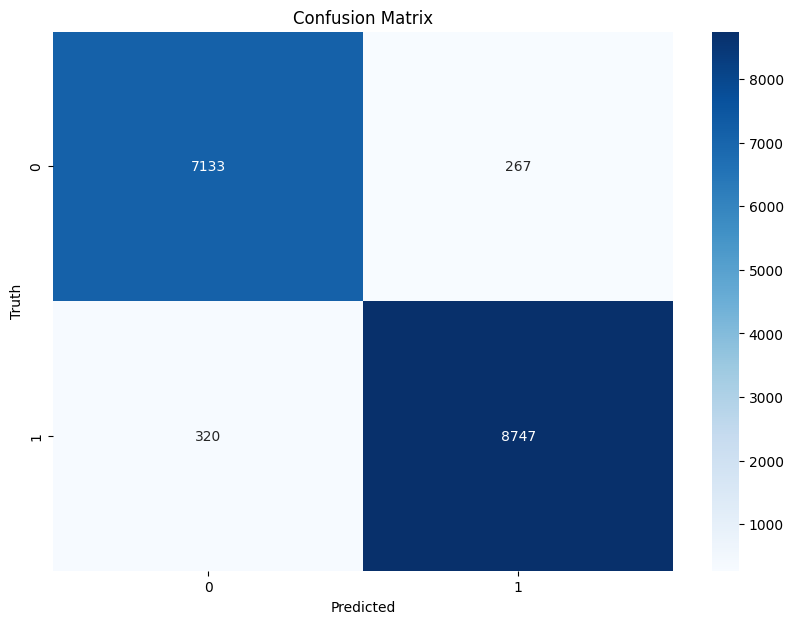

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
y_test = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test
y_pred = np.argmax(y_pred, axis=1) if len(y_pred.shape) > 1 else y_pred
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()


In [53]:
#print the training and testing accuracy
print('Training Accuracy:',history.history['accuracy'][-1])
print('Testing Accuracy:',accuracy_score(y_test, y_pred))

Training Accuracy: 0.9666590690612793
Testing Accuracy: 0.9643529483208841


In [54]:
model_performance.loc['Neural Network','Accuracy'] = accuracy_score(y_test, y_pred)
model_performance.loc['Neural Network','Recall'] = recall_score(y_test, y_pred, average='weighted')
model_performance.loc['Neural Network','Precision'] = precision_score(y_test, y_pred, average='weighted')
model_performance.loc['Neural Network','F1-Score'] = f1_score(y_test, y_pred, average='weighted')
model_performance.loc['Neural Network','time to train'] = end_train-start
model_performance.loc['Neural Network','time to predict'] = time.time()-end_train
model_performance.loc['Neural Network','total time'] = time.time()-start
model_performance

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
Neural Network,0.964353,0.964353,0.964396,0.964364,17.776043,56.929449,74.705492


In [55]:
#plot the performance metrics
fig = go.Figure(data=[
    go.Bar(name='Accuracy', x=model_performance.index, y=model_performance['Accuracy']),
    go.Bar(name='Recall', x=model_performance.index, y=model_performance['Recall']),
    go.Bar(name='Precision', x=model_performance.index, y=model_performance['Precision']),
    go.Bar(name='F1-Score', x=model_performance.index, y=model_performance['F1-Score']),
    go.Bar(name='time to train', x=model_performance.index, y=model_performance['time to train']),
    go.Bar(name='time to predict', x=model_performance.index, y=model_performance['time to predict']),
    go.Bar(name='total time', x=model_performance.index, y=model_performance['total time'])
])

fig.update_layout(barmode='group', title='Model Performance Metrics')
fig.show()

In [56]:
#save the model
model.save('LSTM_model.h5')

In [57]:
#load the model
from keras.models import load_model
model = load_model('LSTM_model.h5', custom_objects={'f1_m': f1_m, 'precision_m':precision_m, 'recall_m':recall_m})

In [94]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Load the model
model = load_model('LSTM_model.h5', custom_objects={'f1_m': f1_m, 'precision_m': precision_m, 'recall_m': recall_m})

# Load the sample data
df_sample = pd.read_csv('sample_data.csv')
df_sample.head()

# Check for missing values in the dataframe

# Replace any placeholder for missing data (e.g., "?" or "") with NaN
df_sample = df_sample.replace("?", np.nan)

# Handle missing values for numerical columns
numerical_columns = df_sample.select_dtypes(include=[np.number]).columns
df_sample[numerical_columns] = df_sample[numerical_columns].fillna(df_sample[numerical_columns].mean())

# Handle missing values for categorical columns (fill with the most frequent value)
categorical_columns = df_sample.select_dtypes(exclude=[np.number]).columns
for col in categorical_columns:
    df_sample[col].fillna(df_sample[col].mode()[0], inplace=True)

# Check for missing values after handling them

# Handle categorical features (proto, service, state)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2, 3])], remainder='passthrough')
X_sample = np.array(ct.fit_transform(df_sample))

# Check the shape after transformation

# Scale the numerical features
sc = StandardScaler()
X_sample[:, 18:] = sc.fit_transform(X_sample[:, 18:])

# Check the final shape after scaling

# Padding if the number of features is less than expected
expected_features = 56
if X_sample.shape[1] < expected_features:
    padding = np.zeros((X_sample.shape[0], expected_features - X_sample.shape[1]))
    X_sample = np.hstack((X_sample, padding))  # Add padding columns with zero values

# Ensure the shape matches the model's input (56 features)
if X_sample.shape[1] != expected_features:
    raise ValueError(f"Mismatch in feature count: Expected {expected_features}, got {X_sample.shape[1]}")

# Make predictions
y_pred_sample = model.predict(X_sample)
y_pred_sample = np.argmax(y_pred_sample, axis=1)  # Convert predictions to class labels

# Print the predicted class labels
print('Predicted class labels for the sample data:', y_pred_sample)

#print class labels attack or normal
class_labels = {0: 'Attack', 1: 'Normal'}
y_pred_sample = [class_labels[i] for i in y_pred_sample]
print('Predicted class labels for the sample data:', y_pred_sample)


1/1 [==============================] - 0s 85ms/step
Predicted class labels for the sample data: [0]
Predicted class labels for the sample data: ['Attack']
